In [1]:
from google.colab import files
files.upload()

Saving fashion-mnist_test.csv to fashion-mnist_test.csv
Saving fashion-mnist_train.csv to fashion-mnist_train.csv


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import *

from sklearn.model_selection import train_test_split

## Train Data Preparation

In [27]:
train = pd.read_csv('./fashion-mnist_train.csv')
X_ = np.array(train)
X = X_[:,1:]

Y_ = X_[:,0]
Y = to_categorical(Y_)

print(X.shape, Y.shape)

(60000, 784) (60000, 10)


In [28]:
test = pd.read_csv('./fashion-mnist_test.csv')
X_ = np.array(test)
X_test = X_[:,1:]

Y_test = X_[:,0]
Y_test = to_categorical(Y_test)

print(X_test.shape, Y_test.shape)

(10000, 784) (10000, 10)


## Splitting into training and validation set

In [29]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=13)

print(X_train.shape, Y_train.shape)
print(X_val.shape, Y_val.shape)

(48000, 784) (48000, 10)
(12000, 784) (12000, 10)


## Preprocessing the data

In [0]:
X_train = X_train.reshape((-1,28,28,1))
X_train = X_train.astype('float32')
X_train /= 255

X_test = X_test.reshape((-1,28,28,1))
X_test = X_test.astype('float32')
X_test /= 255

X_val = X_val.reshape((-1,28,28,1))
X_val = X_val.astype('float32')
X_val /= 255

## Visualize the data

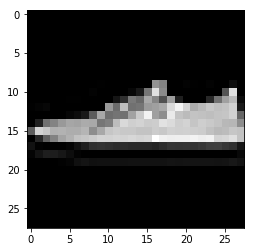

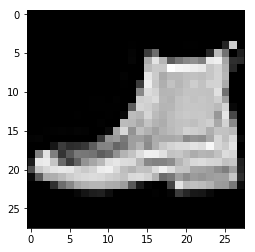

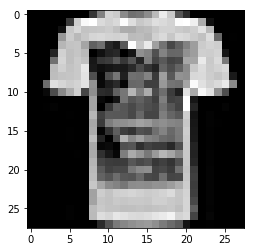

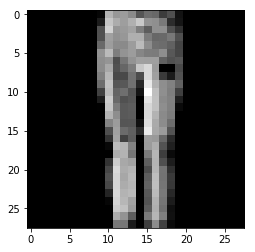

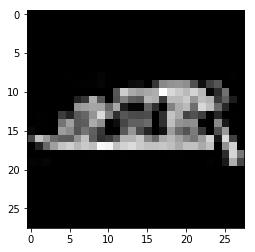

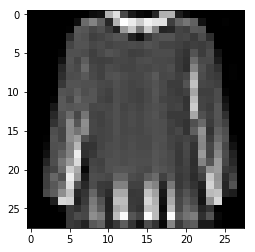

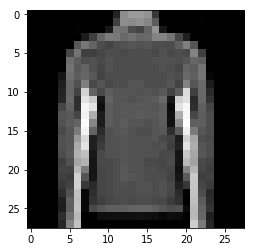

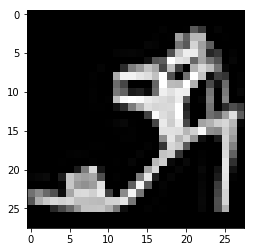

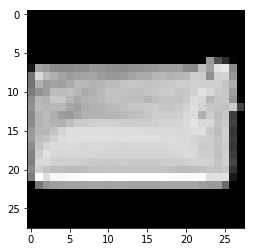

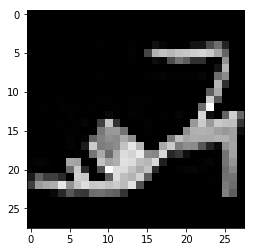

In [31]:
for i in range(10):
  plt.imshow(X_train[i].reshape(28,28), cmap='gray')
  plt.show()

## Training

## CNN Model 1

With 1 convolutional layer

In [32]:
model_1 = Sequential()
model_1.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Dropout(0.2))

model_1.add(Flatten())

model_1.add(Dense(128, activation='relu'))
model_1.add(Dense(10, activation='softmax'))

model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [33]:
model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_1 = model_1.fit(X_train, Y_train, batch_size=256, epochs=50, verbose=1, validation_data=(X_val, Y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 2s 43us/step - loss: 0.5420 - acc: 0.8112 - val_loss: 0.3933 - val_acc: 0.8614
Epoch 2/50
48000/48000 [==============================] - 1s 30us/step - loss: 0.3581 - acc: 0.8755 - val_loss: 0.3503 - val_acc: 0.8771
Epoch 3/50
48000/48000 [==============================] - 1s 30us/step - loss: 0.3132 - acc: 0.8885 - val_loss: 0.3107 - val_acc: 0.8887
Epoch 4/50
48000/48000 [==============================] - 1s 29us/step - loss: 0.2811 - acc: 0.8994 - val_loss: 0.2943 - val_acc: 0.8958
Epoch 5/50
48000/48000 [==============================] - 1s 30us/step - loss: 0.2669 - acc: 0.9035 - val_loss: 0.2822 - val_acc: 0.8972
Epoch 6/50
48000/48000 [==============================] - 1s 30us/step - loss: 0.2474 - acc: 0.9113 - val_loss: 0.2708 - val_acc: 0.9023
Epoch 7/50
48000/48000 [==============================] - 1s 28us/step - loss: 0.2307 - acc: 0.9171 - val_loss: 0.2639 - val_acc

In [34]:
score_1 = model_1.evaluate(X_test, Y_test, verbose=0)
print('Test loss: ', score_1[0])
print('Test accuracy: ', score_1[1]*100)

Test loss:  0.33992794977873564
Test accuracy:  92.28


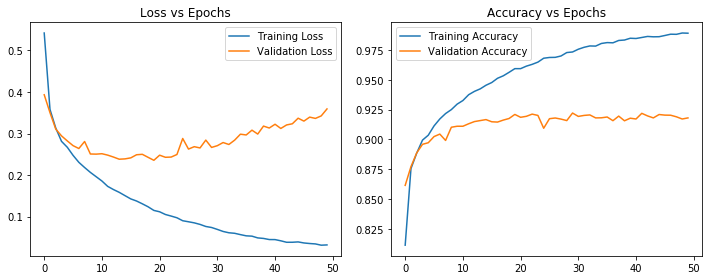

In [35]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.title('Loss vs Epochs')
plt.plot(history_1.history['loss'], label='Training Loss')
plt.plot(history_1.history['val_loss'], label='Validation Loss')
plt.legend()

plt.subplot(1,2,2)
plt.title('Accuracy vs Epochs')
plt.plot(history_1.history['acc'], label='Training Accuracy')
plt.plot(history_1.history['val_acc'], label='Validation Accuracy')
plt.legend()
plt.tight_layout()
plt.show()